In [255]:
import pandas as pd
import os
#https://www.kaggle.com/datasets/dhruvildave/spotify-charts/data
#BIG LIST OF SONGS
big_df = pd.read_csv("us_charts.csv")

# https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
#Songs and their values of music as assigned by Spotify       
dancability_df = pd.read_csv("dataset.csv")
#display(dancability_df)
# https://www.kaggle.com/datasets/irynatokarchuk/top-streamed-spotify-songs-by-year-2010-2023
#Arrangement of the most popular songs from 2010-2023
songs_df = pd.read_csv("spotify_full_list_20102023.csv")      
# preprocess songs_df
songs_df[['Artist', 'Title']] = songs_df['Artist and Title'].str.extract('^(.*?)\s-\s(.*)')

# https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024
#Number of streams for a popular song
sptf_df = pd.read_csv("Most_Streamed_Spotify_Songs_2024.csv", encoding='cp1252')

###                   ###
###THE MASTER DATASET ###
###                   ###

#The master dataset relating all these datasets together      
just_impeccable_df = pd.merge(big_df, dancability_df, how='inner', left_on=['artist', 'title'], right_on=['artists', 'track_name'])
just_impeccable_df = pd.merge(just_impeccable_df, songs_df, how='inner', left_on=['artist', 'title'], right_on=['Artist', 'Title'])
#just_impeccable_df = pd.merge(dancability_df, songs_df, how='inner', left_on=['artists', 'track_name'], right_on=['Artist', 'Title'])
#Make only one title and artist column instead of like 5 of them
just_impeccable_df = just_impeccable_df.drop(columns = ['track_name','Artist and Title','artists'])
#Clean up the rest of the unused data
just_impeccable_df = just_impeccable_df.drop(columns = ['track_id','Unnamed: 0_x', 'Unnamed: 0_y','track_genre'])
just_impeccable_df = just_impeccable_df.drop_duplicates(subset=['Title'], keep='first') #Drop songs with duplicate titles
display(just_impeccable_df)
#print(just_impeccable_df['year'].min())
#print(just_impeccable_df['year'].max())
just_impeccable_df.to_csv('C:\\Users\\yangd\\OneDrive\\Desktop\\Spotify Data Analysis\\just_impeccable.csv')

<>:15: SyntaxWarning: invalid escape sequence '\s'
<>:15: SyntaxWarning: invalid escape sequence '\s'
C:\Users\yangd\AppData\Local\Temp\ipykernel_44928\3231423515.py:15: SyntaxWarning: invalid escape sequence '\s'
  songs_df[['Artist', 'Title']] = songs_df['Artist and Title'].str.extract('^(.*?)\s-\s(.*)')


,title,rank,date,artist,url,region,chart,trend,streams,album_name,...,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre,Title
0,Treat You Better,26,2017-01-01,Shawn Mendes,https://open.spotify.com/track/4Hf7WnR761jpxPr...,United States,top200,MOVE_UP,438954.0,Illuminate,...,Shawn Mendes,2220665417,1027602,2017.0,Pop,"['canadian pop', 'pop', 'viral pop']",canadian pop,pop,viral pop,Treat You Better
5,Heathens,31,2017-01-01,Twenty One Pilots,https://open.spotify.com/track/6i0V12jOa3mr6uu...,United States,top200,MOVE_DOWN,401620.0,Heathens,...,Twenty One Pilots,1826908792,536806,2016.0,Rock,"['modern rock', 'pop', 'pov: indie', 'rock']",modern rock,pop,pov: indie,Heathens
6,Into You,33,2017-01-01,Ariana Grande,https://open.spotify.com/track/7yHEDfrJNd0zWOf...,United States,top200,MOVE_UP,370887.0,Dangerous Woman,...,Ariana Grande,1405366846,576714,2016.0,Pop,['pop'],pop,Unknown,Unknown,Into You
7,Say You Won't Let Go,37,2017-01-01,James Arthur,https://open.spotify.com/track/5uCax9HTNlzGybI...,United States,top200,MOVE_DOWN,361392.0,Back from the Edge,...,James Arthur,2925108650,1441435,2016.0,Pop,"['pop', 'talent show', 'uk pop']",pop,talent show,uk pop,Say You Won't Let Go
8,Cheap Thrills,41,2017-01-01,Sia,https://open.spotify.com/track/27SdWb2rFzO6GWi...,United States,top200,MOVE_UP,345244.0,This Is Acting,...,Sia,734373817,371726,2016.0,Pop,['musical advocacy'],musical advocacy,Unknown,Unknown,Cheap Thrills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281248,Next Level,28,2021-06-07,aespa,https://open.spotify.com/track/2zrhoHlFKxFTRF5...,United States,viral50,NEW_ENTRY,NaN,Next Level,...,aespa,255332167,152364,2021.0,Pop,['k-pop girl group'],k-pop girl group,Unknown,Unknown,Next Level
282296,everything sucks,7,2021-07-01,vaultboy,https://open.spotify.com/track/3z06k8YF9CqX0CG...,United States,viral50,SAME_POSITION,NaN,everything sucks,...,vaultboy,235139034,103203,2021.0,Pop,['singer-songwriter pop'],singer-songwriter pop,Unknown,Unknown,everything sucks
282297,EVERYTHING,13,2021-07-01,The Black Skirts,https://open.spotify.com/track/19Hg1UCZaCdpHB3...,United States,viral50,MOVE_UP,NaN,TEAM BABY,...,The Black Skirts,138613956,98774,2016.0,Indie/Alternative,"['k-indie', 'k-rock', 'korean dream pop', 'kor...",k-indie,k-rock,korean dream pop,EVERYTHING
282308,0X1=LOVESONG (I Know I Love You) feat. Seori,41,2021-07-01,TOMORROW X TOGETHER,https://open.spotify.com/track/1Z8TPHiKeCUyClx...,United States,viral50,MOVE_UP,NaN,The Chaos Chapter: FREEZE,...,TOMORROW X TOGETHER,265830079,110568,2021.0,Pop,"['k-pop', 'k-pop boy group']",k-pop,k-pop boy group,Unknown,0X1=LOVESONG (I Know I Love You) feat. Seori


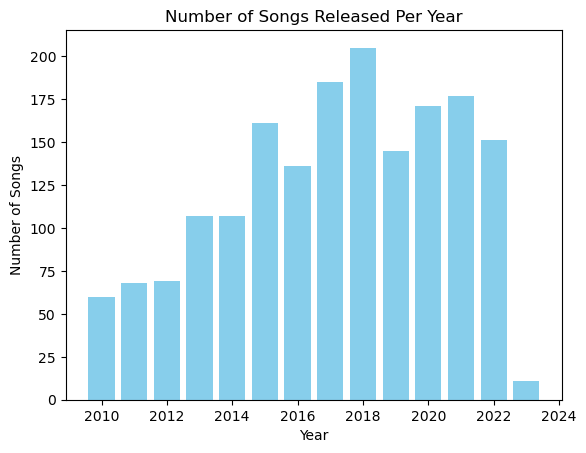

In [245]:
#Plot number of songs per year
import matplotlib.pyplot as plt

#Count the number of songs per year
year_counts = just_impeccable_df['year'].value_counts().sort_index()
#value_counts() shows the number of unique values in that column
#sort_index() sorts the years in ascending values

#Ensure the index is numeric
year_counts.index = year_counts.index.astype(int)  # Convert to integers if necessary

#Bar Graph
fig, ax = plt.subplots()
ax.bar(year_counts.index, year_counts.values, color='skyblue')  # Plotting the bars
ax.set_xlabel('Year')
ax.set_ylabel('Number of Songs')
ax.set_title('Number of Songs Released Per Year')
plt.show()

<Figure size 1400x800 with 0 Axes>

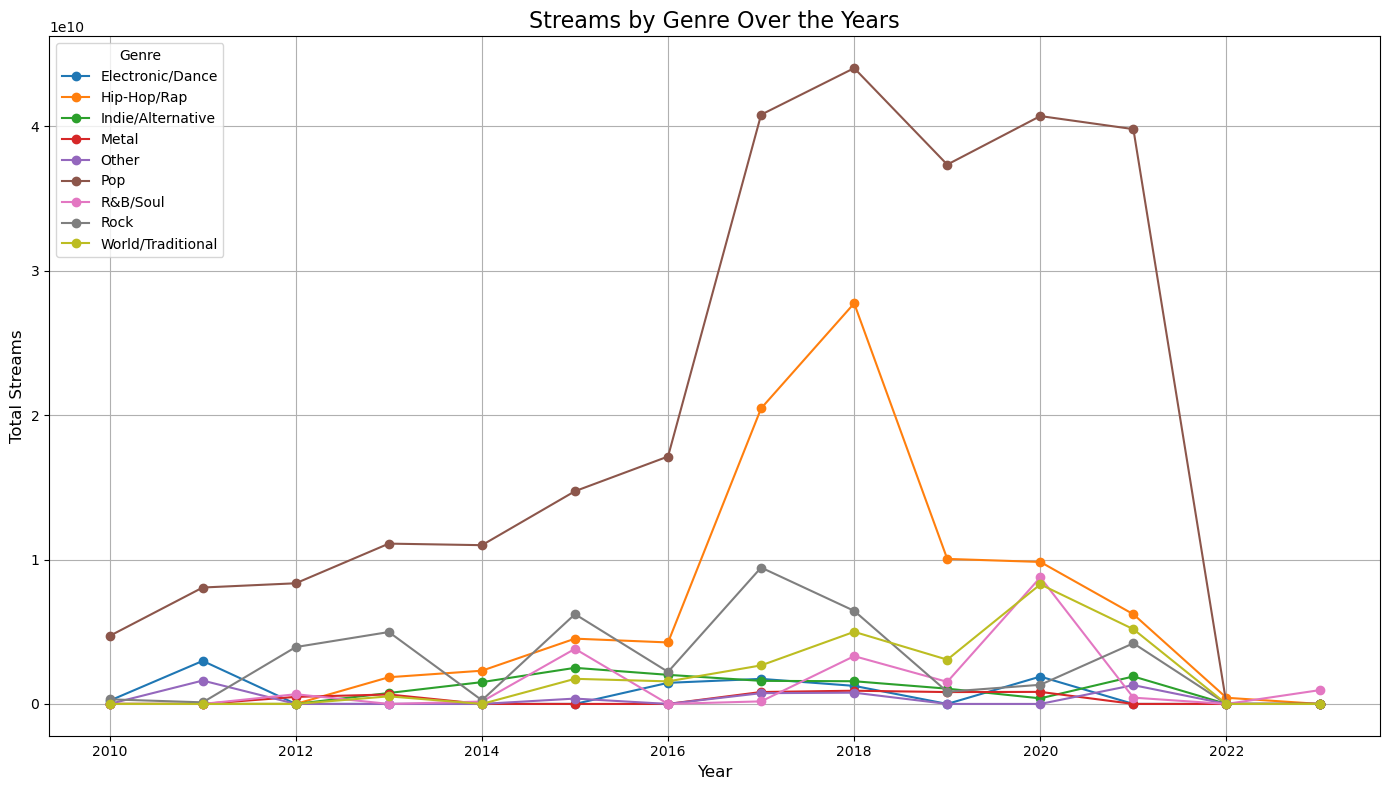

In [319]:
U
#Get the data of the year and their genres so that we can count the streams
filtered_df = just_impeccable_df[['year', 'main_genre', 'Streams']].dropna()

#Count up the data so that we can know how many streams per genre
grouped = filtered_df.groupby(['year', 'main_genre']).sum().reset_index()

#Pivot the table so it can be graphed on 2 axis
pivot_table = grouped.pivot(index='year', columns='main_genre', values='Streams').fillna(0)

#Plot the data
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Streams by Genre Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Streams', fontsize=12)
plt.legend(title='Genre', loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('genreComparison.png')
plt.show()

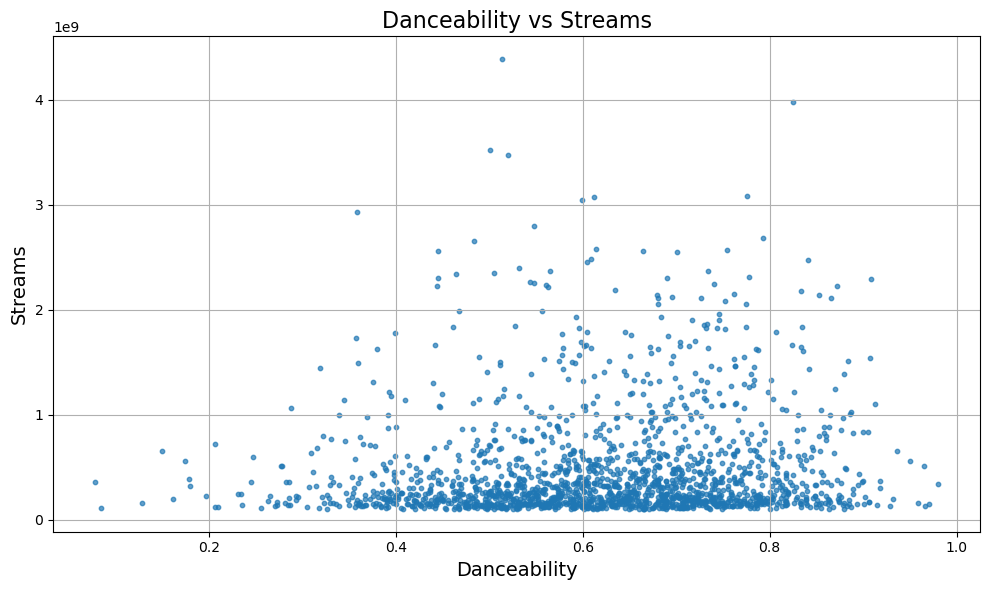

In [249]:
#Plot Dancability vs Total amount of streams
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(just_impeccable_df['danceability'], just_impeccable_df['Streams'], alpha = 0.7, s=10)

# Add titles and labels
plt.title('Danceability vs Streams', fontsize=16)
plt.xlabel('Danceability', fontsize=14)
plt.ylabel('Streams', fontsize=14)plt.grid()
plt.tight_layout()
plt.show()

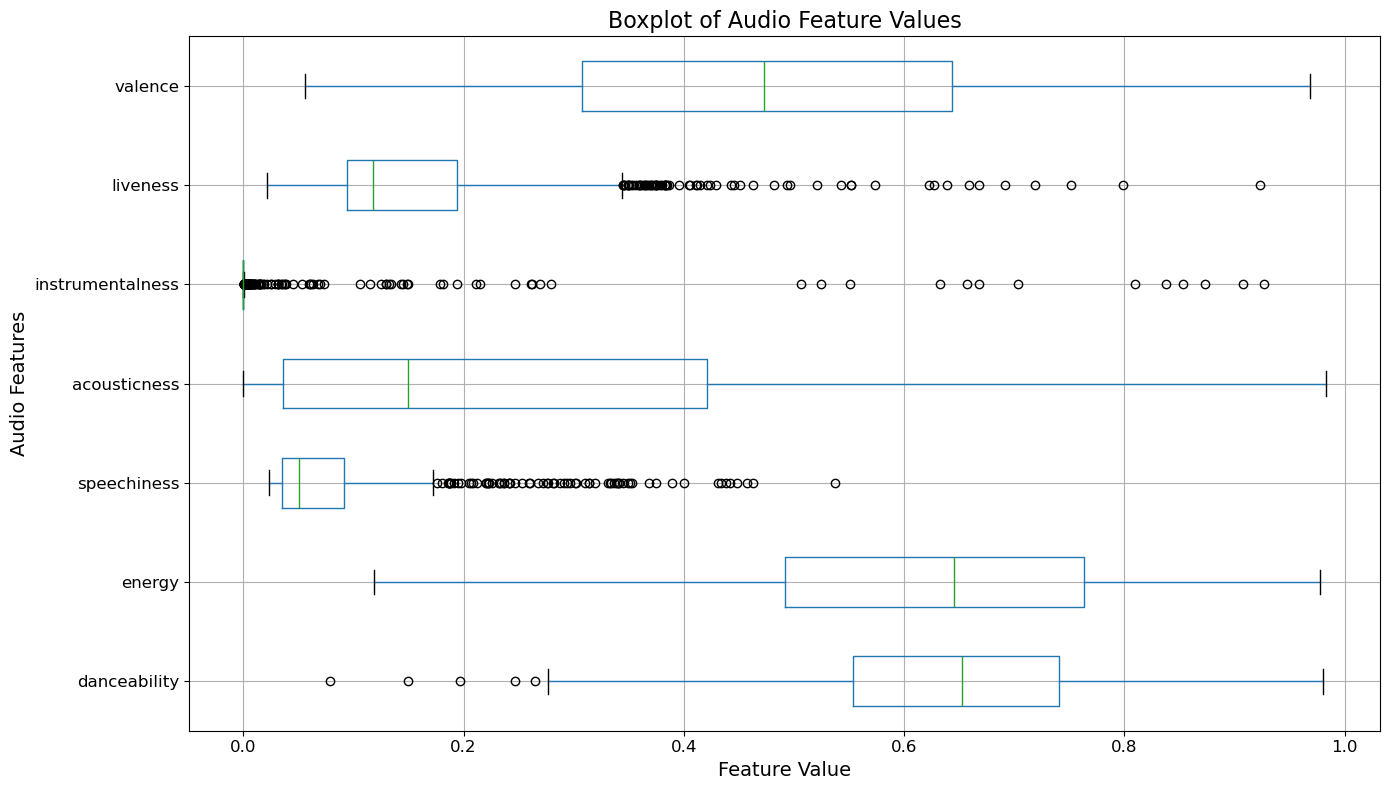

In [259]:
#Boxplot of all the audio features (This one sucks)
# List of audio features
audio_features = [
    'danceability', 'energy', 'duration_ms', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]
# Prepare the DataFrame for boxplot
feature_values_df = just_impeccable_df[audio_features]

# Create a boxplot
plt.figure(figsize=(14, 8))
feature_values_df.boxplot(grid=True, vert=False, fontsize=12)

# Add labels and title
plt.title('Boxplot of Audio Feature Values', fontsize=16)
plt.xlabel('Feature Value', fontsize=14)
plt.ylabel('Audio Features', fontsize=14)

# Tight layout and show the plot
plt.tight_layout()
plt.show()


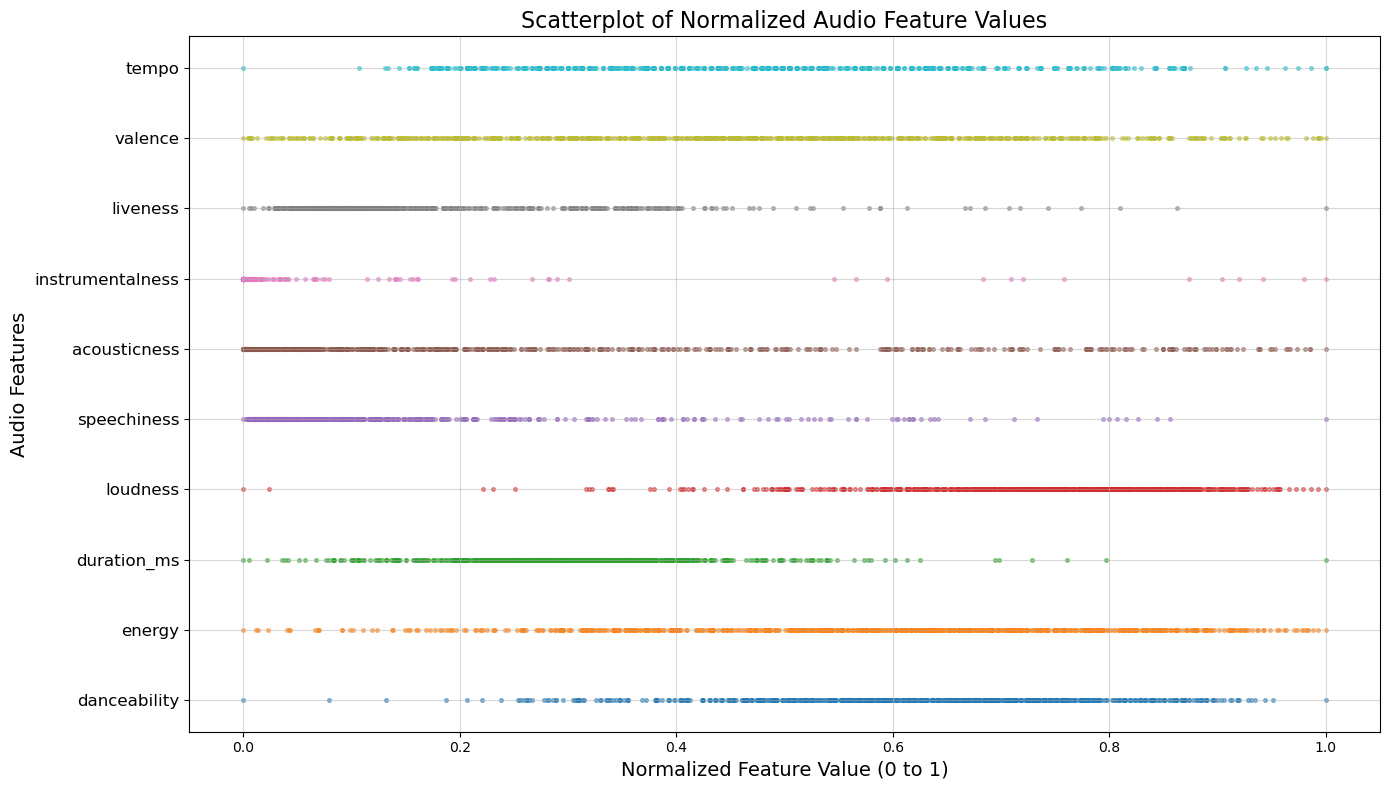

In [323]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# List of audio features
audio_features = [
    'danceability', 'energy', 'duration_ms', 'loudness', 'speechiness', 
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

#Prepare the data for normalization
feature_values_df = just_impeccable_df[audio_features]

#Normalize the data using MinMaxScaler (idk how it does this but it sure is normalized)
scaler = MinMaxScaler()
normalized_values = scaler.fit_transform(feature_values_df)
normalized_df = pd.DataFrame(normalized_values, columns=audio_features)

# Create a scatterplot for normalized data
plt.figure(figsize=(14, 8))

# For each feature, scatter its normalized values with some jitter to separate points
for i, feature in enumerate(audio_features):
    plt.scatter(
        normalized_df[feature],  # Normalized values on x-axis
        [feature] * len(normalized_df),  # Feature name on y-axis
        alpha=0.5,
        s=7,
        label=feature
    )

# Add labels and title
plt.title('Scatterplot of Normalized Audio Feature Values', fontsize=16)
plt.ylabel('Audio Features', fontsize=14)
plt.xlabel('Normalized Feature Value (0 to 1)', fontsize=14)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.savefig('Normalized.png')
plt.show()
